# Project: Maximum Matching in Bipartite Graphs (Marriage Matching)

## Step 1: Theoretical Introduction

In this project, we focus on **Maximum Bipartite Matching**, often referred to as *Marriage Matching* when edges represent admissible pairings rather than costs.

### Key Definitions

**Bipartite Graph**  
A graph $G = (U \cup V, E)$ is called *bipartite* if its vertex set can be divided into two disjoint sets $U$ and $V$, such that every edge connects a vertex from $U$ to a vertex from $V$.

**Matching**  
A *matching* is a set of edges such that no two edges share a common vertex.

**Maximum Matching**  
A matching is called *maximum* if it contains the largest possible number of edges among all matchings in the graph.

---

## Berge’s Lemma

The algorithm implemented in this project is based on **Berge’s Lemma**, a central theorem in matching theory.

**Berge’s Lemma** states:

> A matching $M$ in a graph $G$ is a maximum matching **if and only if** there exists no augmenting path with respect to $M$.

This result provides both a theoretical characterization of maximum matchings and the foundation for constructive algorithms.

---

## Augmenting Paths

To understand Berge’s Lemma, we first define two important types of paths.

### Alternating Path

An **alternating path** is a path in which edges alternate between:
- edges belonging to the current matching $M$,
- edges not belonging to $M$.

### Augmenting Path

An **augmenting path** is an alternating path that:
- starts at a free (unmatched) vertex,
- ends at a free (unmatched) vertex.

### Why Augmenting Paths Matter

If an augmenting path exists, we can **augment** the matching by flipping the edges along the path:
- matched edges become unmatched,
- unmatched edges become matched.

Since the path starts and ends with free vertices, this operation **increases the size of the matching by exactly one edge**.  
Therefore, the existence of an augmenting path implies that the matching is not maximum.

---

## Step 1 Algorithm: DFS-Based Maximum Bipartite Matching

We use a **Depth-First Search (DFS)** approach to iteratively search for augmenting paths.

### Algorithm Logic

1. Attempt to match a left-side vertex $u \in U$ with a right-side vertex $v \in V$.
2. If $v$ is free, directly match $u$ and $v$.
3. If $v$ is already matched with another vertex $u'$, attempt to reassign $u'$ to a different vertex using a recursive DFS step.
4. If such a reassignment succeeds, $v$ becomes free and can be matched with $u$.

This recursive reassignment corresponds exactly to finding an augmenting path in the graph.

---

In [6]:
class BipartiteMatching:
    def __init__(self, left_nodes, right_nodes):
        self.m = left_nodes
        self.n = right_nodes
        self.adj = [[] for _ in range(left_nodes)] # adjacency list to store the graph
        self.match_right = [-1] * right_nodes

    def add_edge(self, u, v):
        self.adj[u].append(v)

    def _dfs(self, u, visited):
        for v in self.adj[u]:
            if not visited[v]:
                visited[v] = True

                if self.match_right[v] < 0 or self._dfs(self.match_right[v], visited):
                    self.match_right[v] = u
                    return True
        return False
    
    def add_edges_from(self, edge_list):
        for u, v in edge_list:
            self.add_edge(u, v)

    def maximum_matching(self):
        match_count = 0
        self.match_right = [-1] * self.n
        
        for u in range(self.m):
            visited = [False] * self.n
            
            if self._dfs(u, visited):
                match_count += 1
                
        pairs = []
        for v in range(self.n):
            if self.match_right[v] != -1:
                pairs.append((self.match_right[v], v))
                
        return match_count, pairs

#example usage

if __name__ == "__main__":
    print("--- Maximum Bipartite Matching Project ---")
    
    # Example: 4 Applicants (Left: 0,1,2,3) applying for 4 Jobs (Right: 0,1,2,3)
    # 0 wants Job 1 or 2
    # 1 wants Job 1
    # 2 wants Job 2 or 3
    # 3 wants Job 2
    
    applicants = 4
    jobs = 4
    bm = BipartiteMatching(applicants, jobs)

    
    bm.add_edges_from([
        (0, 1), (0, 2),
        (1, 1),
        (2, 2), (2, 3),
        (3, 2)
    ])

    count, matches = bm.maximum_matching()

    print(f"Maximum Matching Size: {count}")
    print("Matched Pairs (Applicant -> Job):")
    for u, v in matches:
        print(f"  Applicant {u} is matched with Job {v}")

--- Maximum Bipartite Matching Project ---
Maximum Matching Size: 3
Matched Pairs (Applicant -> Job):
  Applicant 1 is matched with Job 1
  Applicant 0 is matched with Job 2
  Applicant 2 is matched with Job 3


## Step 2: Visualization Logic

To clearly illustrate the concept of **Maximum Matching**, we visualize the bipartite graph using **NetworkX** and **Matplotlib**.

### Visualization Design

- **Two-Column Layout**  
  Nodes are strictly arranged into two vertical columns:
  - Left column: set $U$
  - Right column: set $V$  
  This layout visually enforces the bipartite structure of the graph.

- **Dashed Grey Edges**  
  Represent all possible edges in the graph (all admissible pairings).

- **Solid Red Edges**  
  Represent the edges selected by the algorithm, i.e., the **Maximum Matching**.

This visualization makes it easy to distinguish between all potential connections and the final optimal pairing produced by the algorithm.


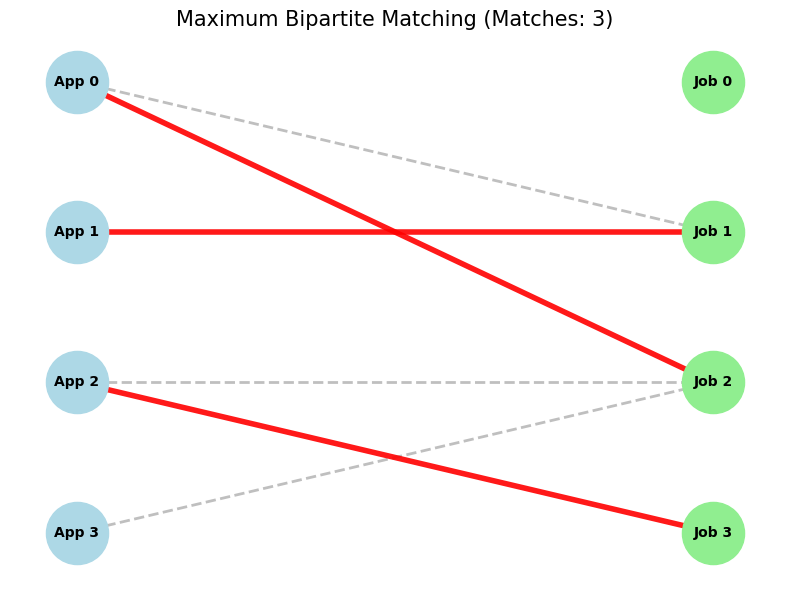

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

class BipartiteMatching:
    def __init__(self, left_nodes, right_nodes):
        self.m = left_nodes
        self.n = right_nodes
        self.adj = [[] for _ in range(left_nodes)]
        self.match_right = [-1] * right_nodes

    def add_edge(self, u, v):
        self.adj[u].append(v)

    def _dfs(self, u, visited):
        for v in self.adj[u]:
            if not visited[v]:
                visited[v] = True
                if self.match_right[v] < 0 or self._dfs(self.match_right[v], visited):
                    self.match_right[v] = u
                    return True
        return False

    def maximum_matching(self):
        match_count = 0
        self.match_right = [-1] * self.n
        for u in range(self.m):
            visited = [False] * self.n
            if self._dfs(u, visited):
                match_count += 1
        pairs = []
        for v in range(self.n):
            if self.match_right[v] != -1:
                pairs.append((self.match_right[v], v))
        return match_count, pairs

def visualize_matching(bm_instance, left_count, right_count):
    G = nx.Graph()
    
    left_nodes = [f"App {i}" for i in range(left_count)]
    right_nodes = [f"Job {i}" for i in range(right_count)]
    
    G.add_nodes_from(left_nodes, bipartite=0)
    G.add_nodes_from(right_nodes, bipartite=1)

    all_edges = []
    for u in range(left_count):
        for v in bm_instance.adj[u]:
            G.add_edge(f"App {u}", f"Job {v}")
            all_edges.append((f"App {u}", f"Job {v}"))

    _, matches = bm_instance.maximum_matching()
    matched_edges = [(f"App {u}", f"Job {v}") for u, v in matches]

    pos = {}
    for i, node in enumerate(left_nodes):
        pos[node] = (-1, -i)
    for i, node in enumerate(right_nodes):
        pos[node] = (1, -i)

    plt.figure(figsize=(8, 6))
    
    #drawing nodes
    nx.draw_networkx_nodes(G, pos, nodelist=left_nodes, node_color='lightblue', node_size=2000)
    nx.draw_networkx_nodes(G, pos, nodelist=right_nodes, node_color='lightgreen', node_size=2000)
    
    #drawing labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    # non-matched edges (grey)
    non_matched = [e for e in all_edges if e not in matched_edges and (e[1], e[0]) not in matched_edges]
    nx.draw_networkx_edges(G, pos, edgelist=non_matched, width=2, alpha=0.5, edge_color="grey", style="dashed")

    # matched edges (red)
    nx.draw_networkx_edges(G, pos, edgelist=matched_edges, width=4, alpha=0.9, edge_color="red")

    plt.title(f"Maximum Bipartite Matching (Matches: {len(matches)})", fontsize=15)
    plt.axis('off') 
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":

    applicants = 4
    jobs = 4
    bm = BipartiteMatching(applicants, jobs)

    bm.add_edge(0, 1)
    bm.add_edge(0, 2)
    bm.add_edge(1, 1)
    bm.add_edge(2, 2)
    bm.add_edge(2, 3)
    bm.add_edge(3, 2)

    visualize_matching(bm, applicants, jobs)

## 3. Why Does This Matter? Real-World Applications

The **Maximum Bipartite Matching** algorithm is not merely a theoretical construct. It forms the computational backbone of many real-world systems that require efficient pairing between two distinct sets. Whenever two groups of entities must be matched in a way that maximizes overall utilization or efficiency, this algorithm—or one of its extensions—is typically involved.

---

### 1. Ride-Sharing Platforms (Resource Allocation)

**The Problem**  
Ride-sharing services such as Uber or Lyft operate with two disjoint sets:
- Riders (set $U$) requesting transportation
- Drivers (set $V$) available to provide rides

**The Constraint**  
A driver is connected to a rider only if the driver is within a feasible pickup distance (e.g., a 5-minute radius).

**The Goal**  
The system must compute matches in real time to maximize the number of riders who are picked up.

**Why It Matters**  
If the matching algorithm performs poorly, drivers remain idle while riders experience long wait times, directly impacting user satisfaction and company revenue.

---

### 2. Online Advertising (Ad Placement)

**The Problem**  
Each time a webpage is loaded, there are multiple advertisement slots (set $V$) that need to be filled. On the other side are advertisers (set $U$) competing to display their ads.

**The Constraint**  
Advertisers only bid on specific keywords or audience categories (e.g., a sports brand bidding on “running shoes” but not on “food delivery”).

**The Goal**  
Platforms such as Google or Meta must match advertisers to available ad slots in a way that maximizes the number of ads displayed and, consequently, advertising revenue.

---

### 3. Kidney Paired Donation (Saving Lives)

This is widely regarded as one of the most impactful applications of graph theory in modern healthcare.

**The Scenario**  
- Patient A requires a kidney transplant.
- Donor A is willing to donate but is biologically incompatible with Patient A.

**The Solution**  
The algorithm searches for another incompatible pair (Patient B and Donor B) such that:
- Donor A is compatible with Patient B
- Donor B is compatible with Patient A

**The Match**  
This forms a *swap*, which corresponds to a perfect matching of size 2 in a bipartite graph.

**Impact**  
By maximizing such matchings across national or international databases, hospitals enable thousands of life-saving transplants that would otherwise be impossible.

---
